In [1]:
#Bifurcation map

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
from random import random


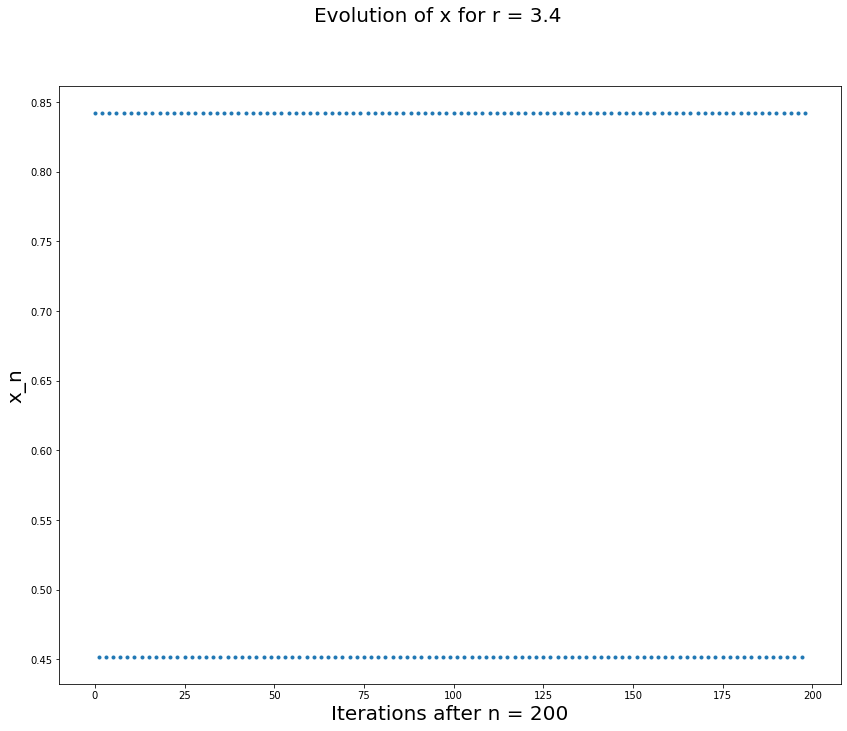

In [2]:
n = 200 
m = 200
x_i = random()
r = 3.4
x_n = []
def map_fun(r, x):
    return r*x*(1-x)

for i in range (n+m):
    x_i = map_fun(r, x_i)
    if i > n:
        x_n.append(x_i)
        
plt.figure(figsize=(14, 11))
plt.suptitle('Evolution of x for r = {}'.format(r), fontsize = 20)
plt.xlabel('Iterations after n = {}'.format(n), fontsize = 20)
plt.ylabel('x_n', fontsize = 20)
plt.plot(x_n, '.')


In [3]:
x_i = random()  #initial value of x
n = 200  #number of iterations
last = 200  #number of last values that we take into account
r_values = np.linspace(0, 4, 500)

res = []
for r in r_values:
    x_n = []
    x_i = random()
    for i in range(n+last):
        x_i = map_fun(r, x_i)
        if i >= n:
            x_n.append(x_i) 


    res.append(x_n)



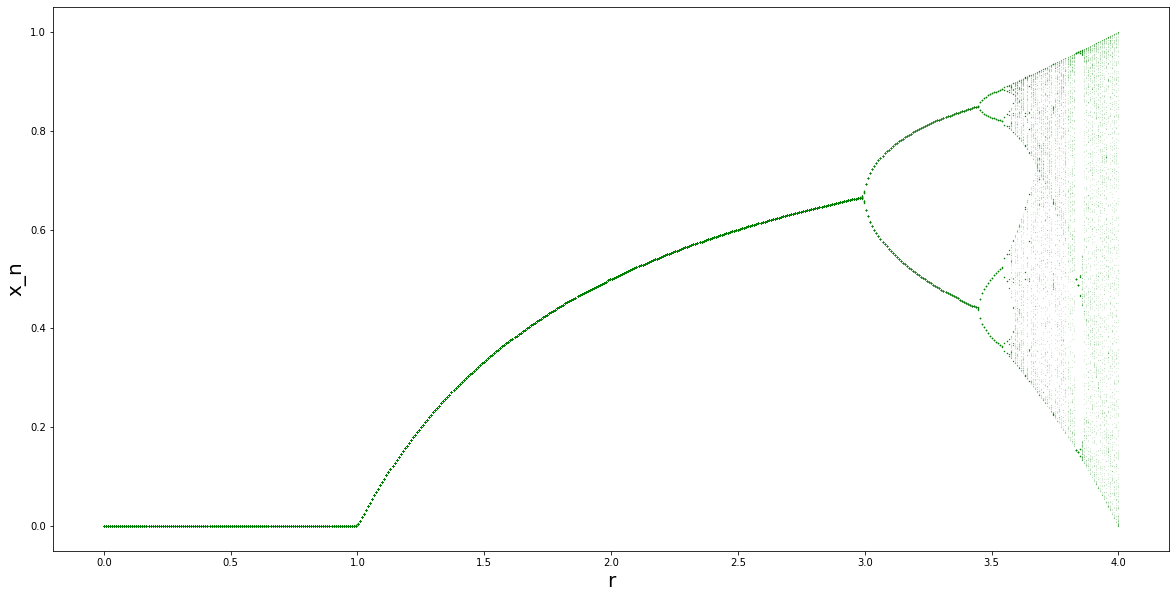

In [4]:

plt.figure(figsize=(20, 10))
plt.xlabel('r', fontsize = 20)
plt.ylabel('x_n', fontsize = 20)
_ = plt.plot(r_values, res, 'g.', markersize = 0.1)

In [ ]:
timeit_arr = []
for i in range(1, 8):
    timeit_value = %timeit -o !mpiexec mpirun -n {i} python bifurcation_v2.py
#    timeit_arr.append(sum(timeit_value.all_runs)/len(timeit_value.all_runs))
    timeit_arr.append(timeit_value.average)


2.47 s ± 205 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.96 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.31 s ± 162 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.55 s ± 44.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.28 s ± 442 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0.5, 0.98, 'Speedup in depend on num of processes')

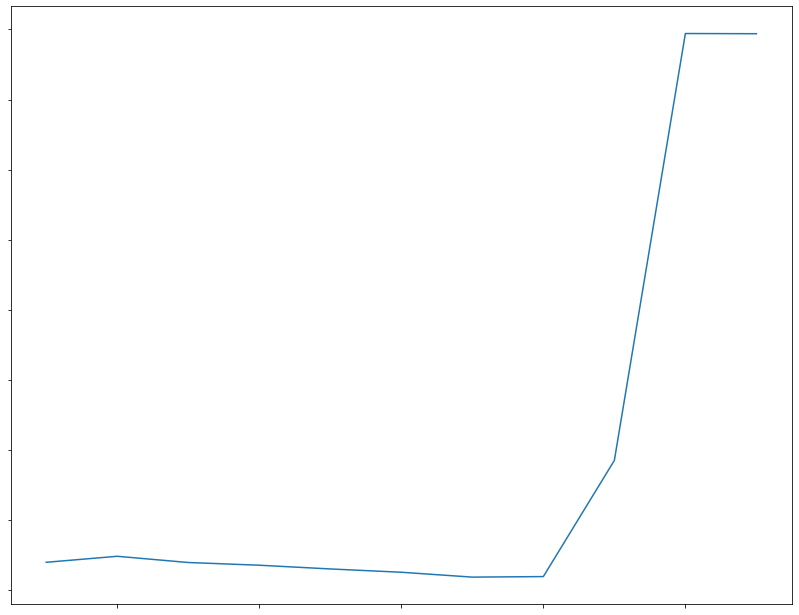

In [10]:
t1 = timeit_arr[0]
num_of_processes = np.linspace(1, len(timeit_arr), len(timeit_arr))
def SpeedUp(tn):
    return t1/tn
Speedup = list(map(SpeedUp, timeit_arr))
plt.figure(figsize=(14, 11))
plt.plot(num_of_processes, Speedup)
plt.xlabel('number of processes', fontsize = 20)
plt.ylabel('Speedup = t1/tn', fontsize = 20)
plt.suptitle('Speedup in depend on num of processes', fontsize = 20)


#Speedup = t1/tn